# **Plot skin friction *Cf* for the distance based ML model**

1. No wall function

2. With standard wall function

3. Distance based data-driven wall function with correction at the wall

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
output = "output/2DflatPlate_wallCorr"
!mkdir -p $output

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_wall = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_ddwall = [run + 'flatPlate_distanceBased/turbulentFlatPlate_distanceBased_full/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_U_center
0,0.000486,0.009146,1.0,1.269526e-07,0.000014,1.583814e+06,3.649665e-12,1.731617e+08,1.549680e+06,48.110892,0.013390,48.541443,0.016123,78.113742,78.243767,-0.00295,0.686747
1,0.001458,0.022783,1.0,3.162233e-07,0.000014,1.914837e+06,2.250102e-12,8.404798e+07,1.896512e+06,23.351713,0.010872,23.878631,0.013276,59.559667,59.667408,-0.00295,0.322626
2,0.002433,0.036846,1.0,5.114188e-07,0.000014,1.455389e+06,2.193480e-12,3.949951e+07,1.452869e+06,10.974461,0.004837,11.378122,0.005993,32.721791,32.770700,-0.00295,0.140600
3,0.003410,0.048961,1.0,6.795825e-07,0.000014,1.137816e+06,1.686225e-12,2.323911e+07,1.137495e+06,6.456706,0.001897,6.772744,0.002377,20.795550,20.814890,-0.00295,0.074159
4,0.004390,0.066110,1.0,9.176073e-07,0.000014,1.004095e+06,1.393444e-12,1.518824e+07,1.003923e+06,4.219869,0.000851,4.498797,0.001079,17.582720,17.591336,-0.00295,0.041263


In [6]:
x0 = 0
Rex = (tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf
Cf_nowall = [np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall = [np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddwall = [tauw_data_ddwall[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddwall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [7]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

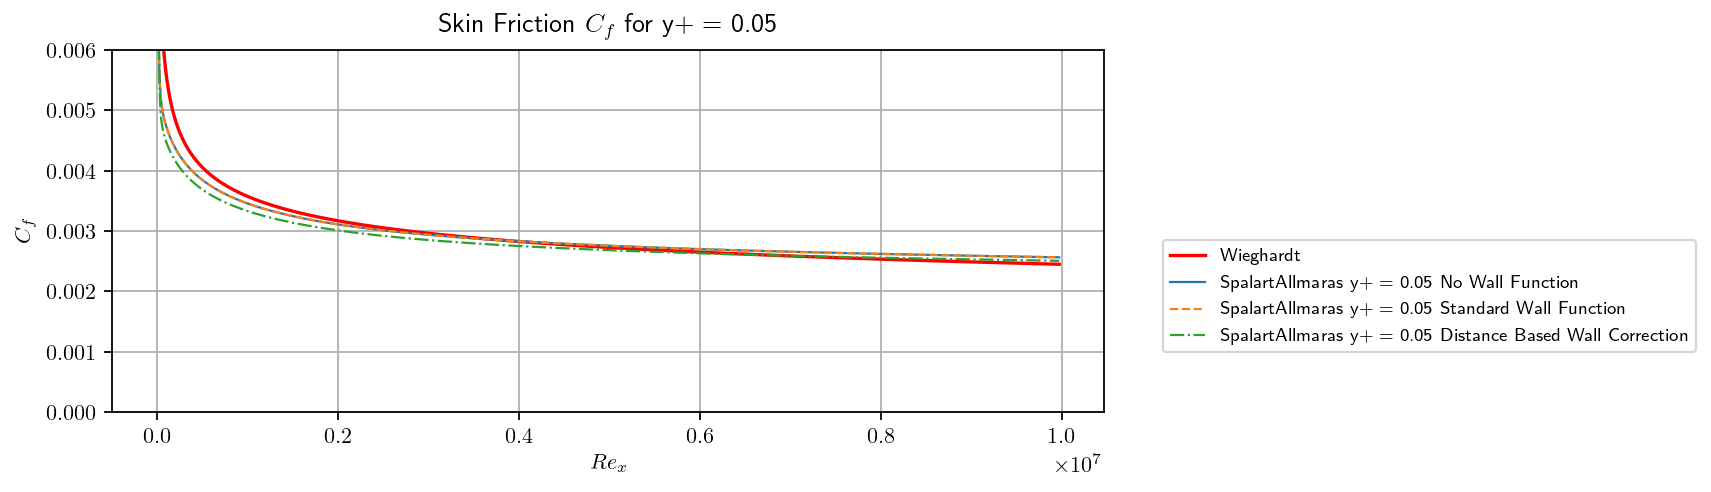

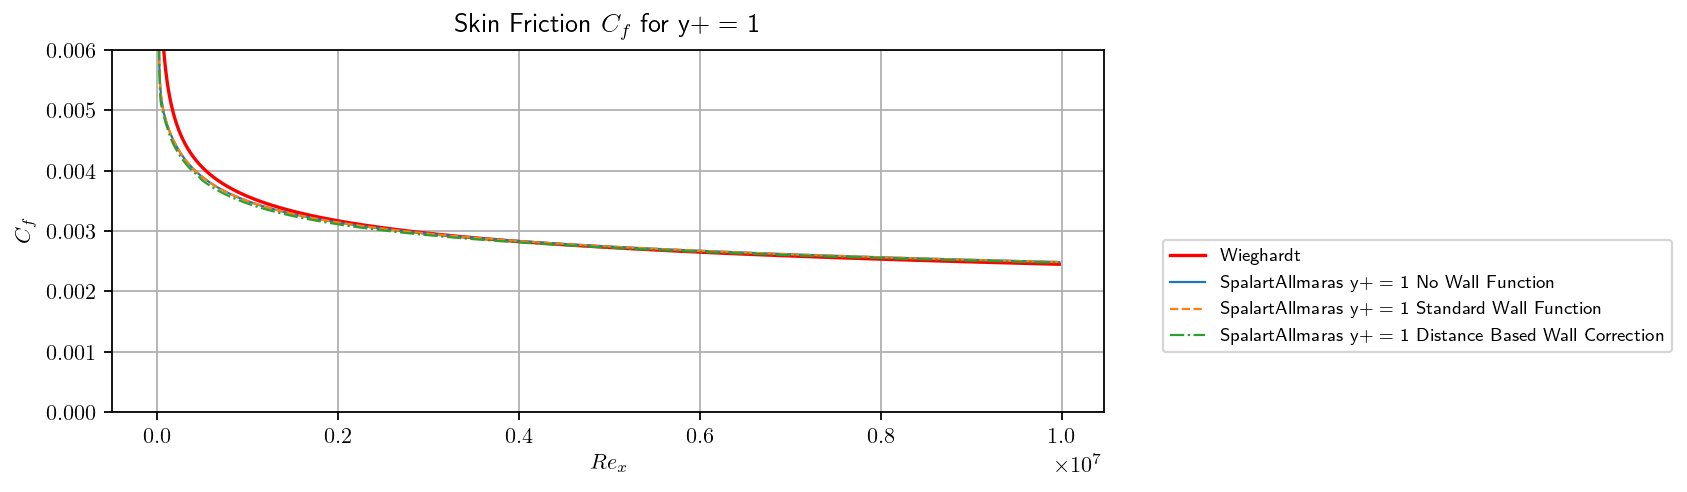

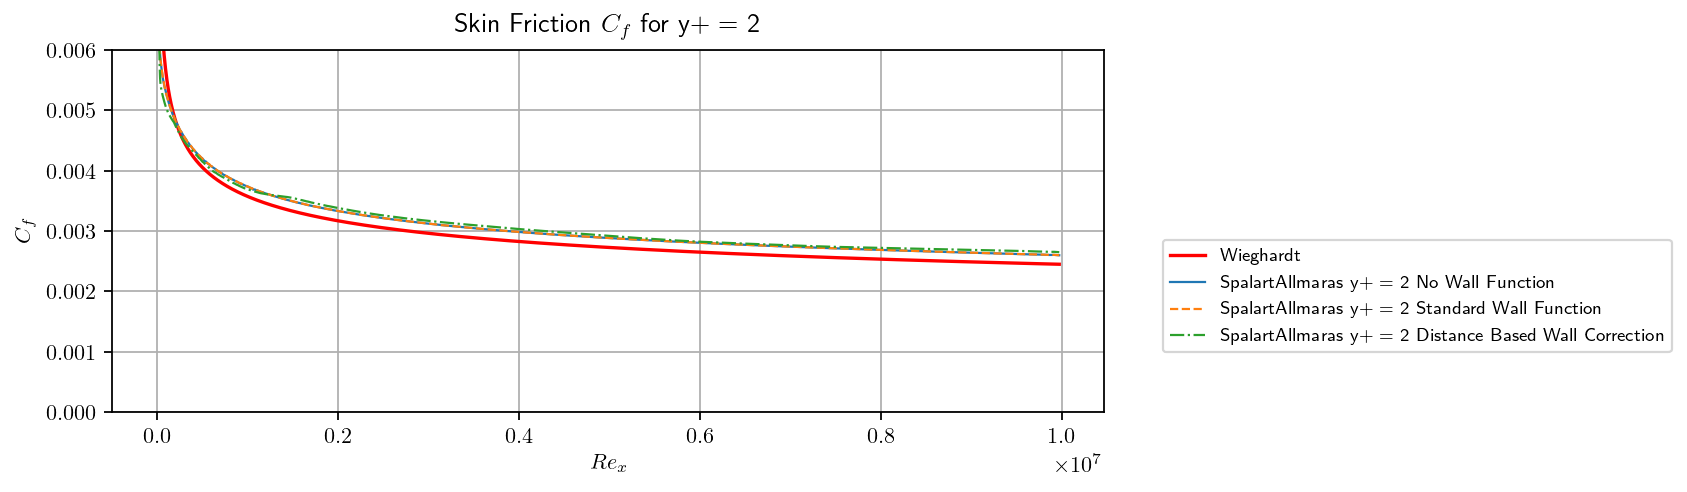

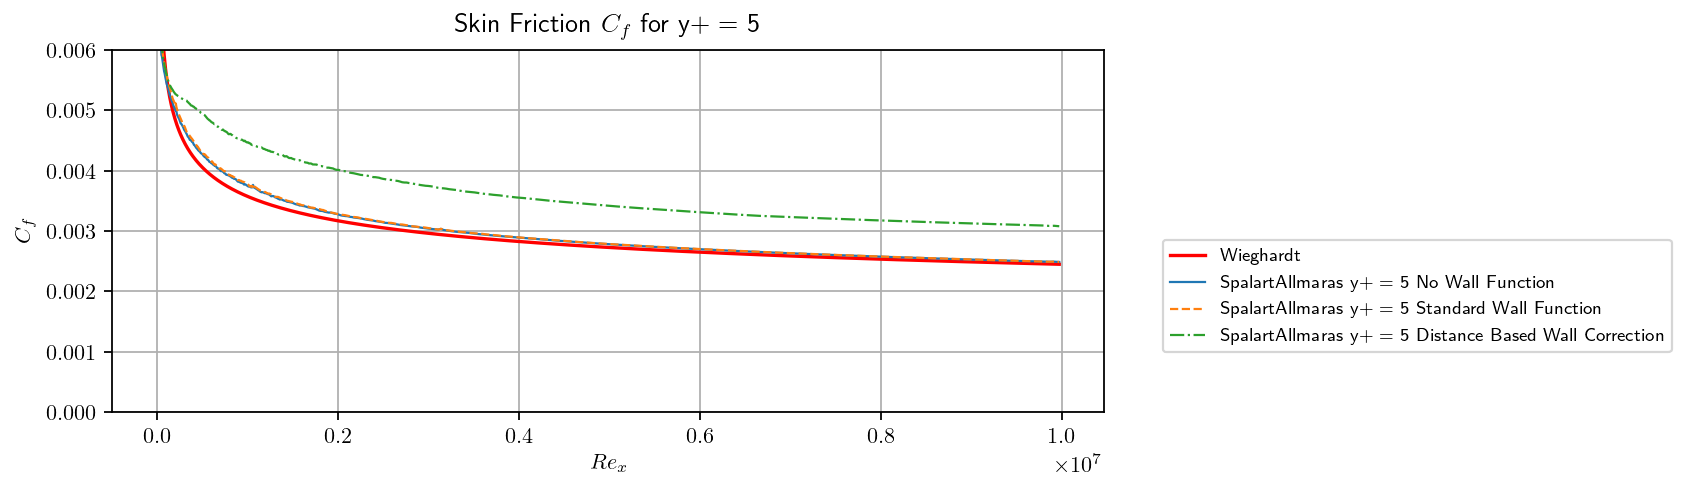

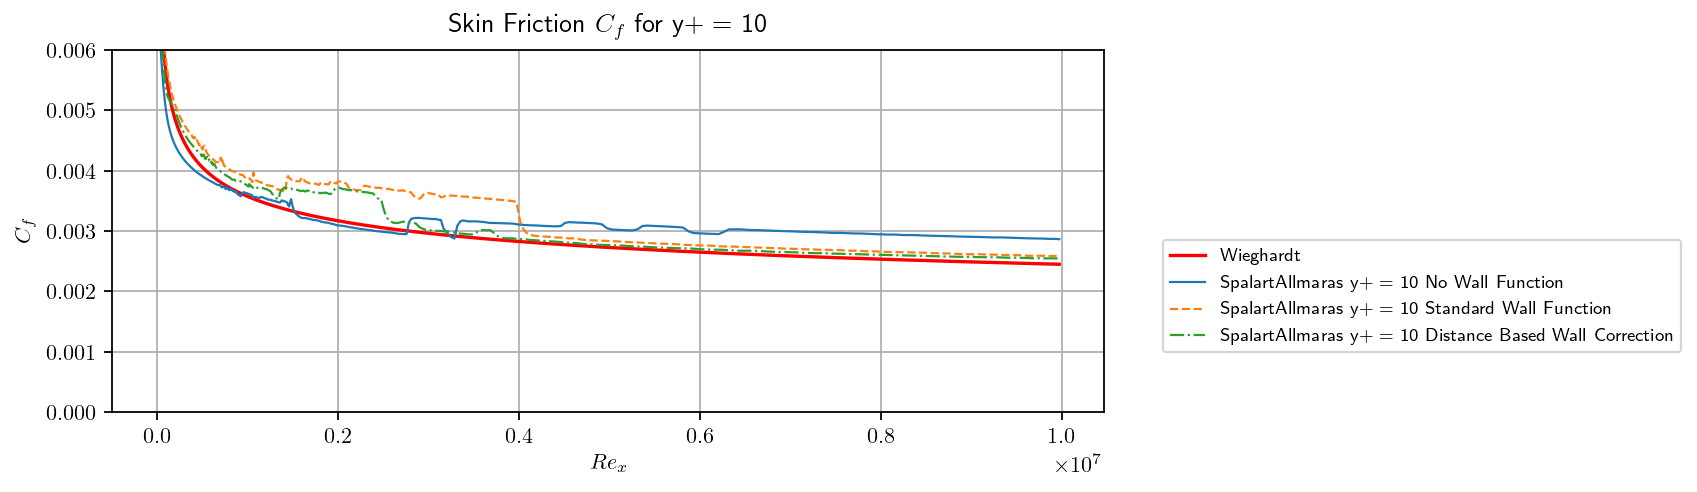

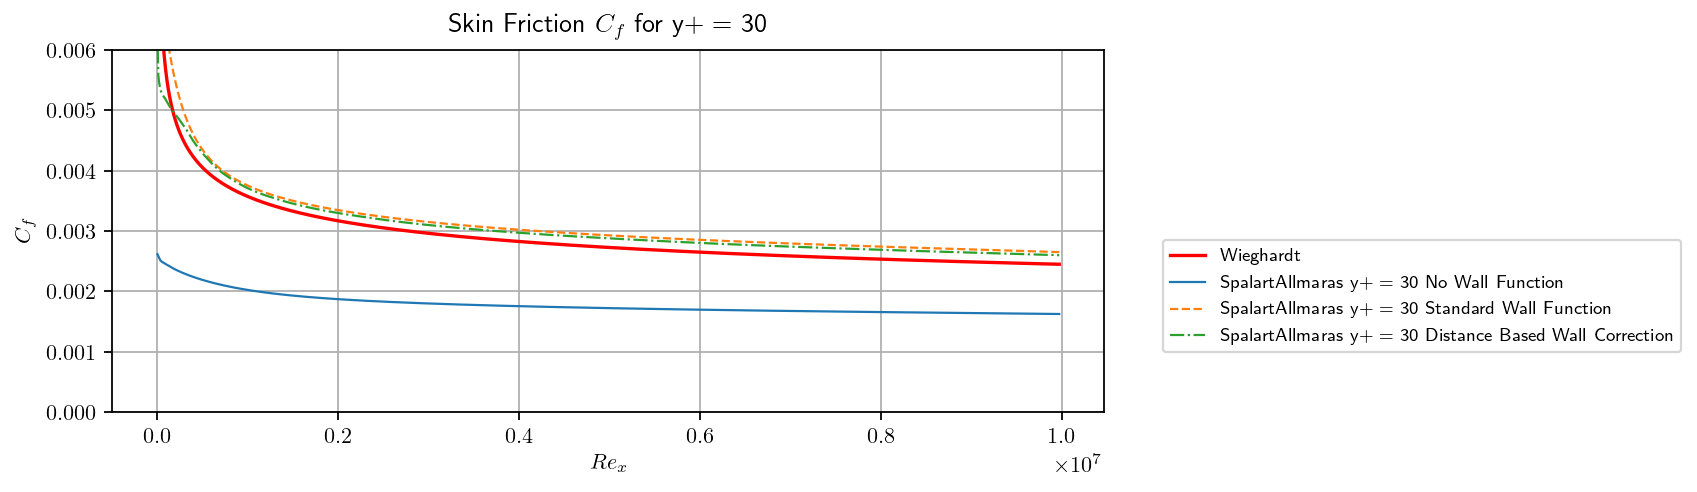

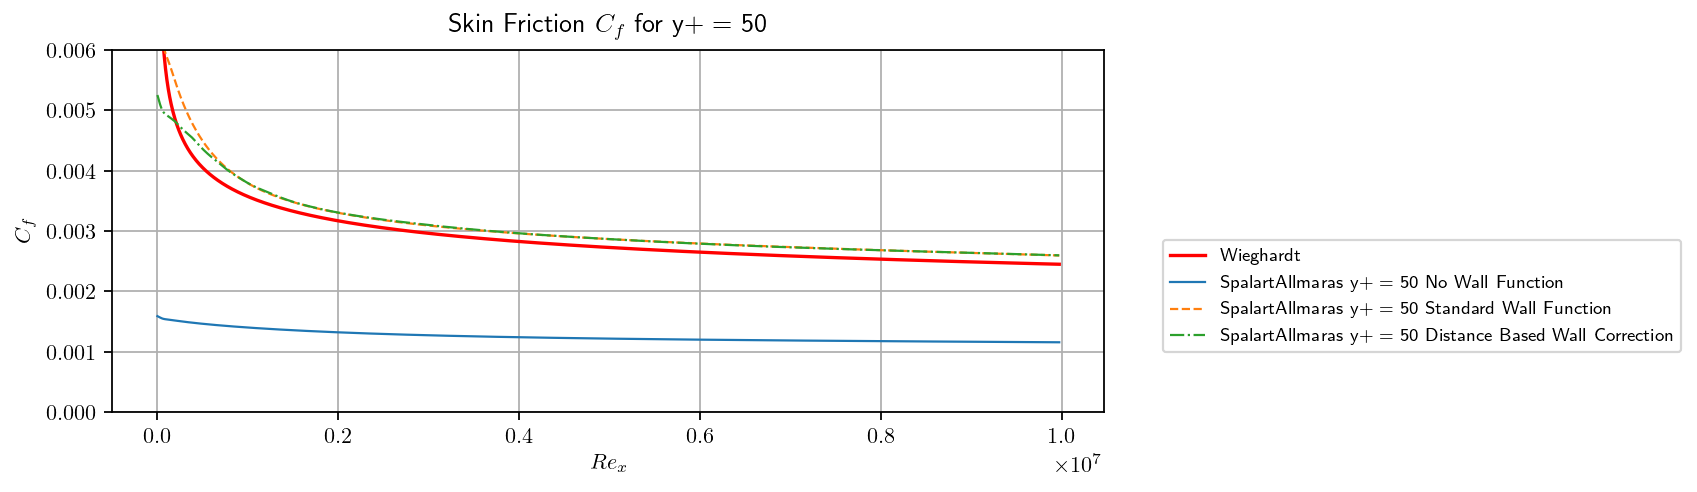

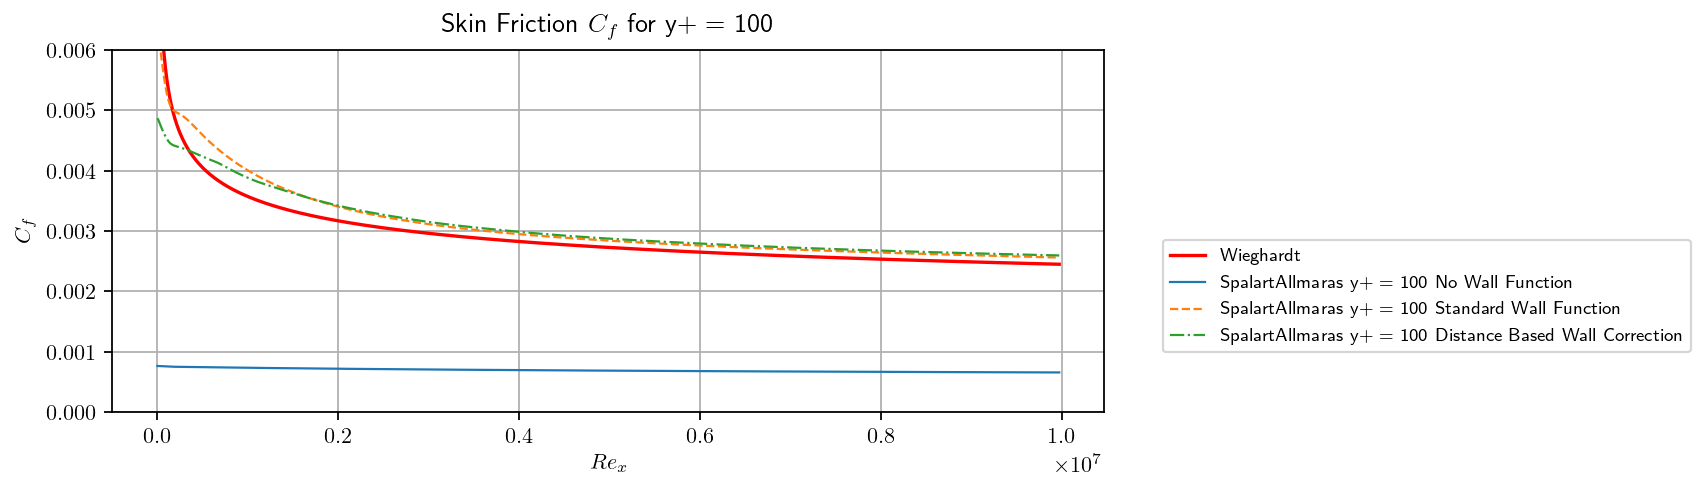

In [10]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "{} y+ = {} No Wall Function".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "{} y+ = {} Standard Wall Function".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {} Distance Based Wall Correction".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))
    plt.savefig(output + "/Cf_yp{}_distanceBasedAll.pdf".format(yp[j]), bbox_inches="tight")

### Comparison *Cf* of distance based data-driven wall function with the correction at the wall for different *y+*

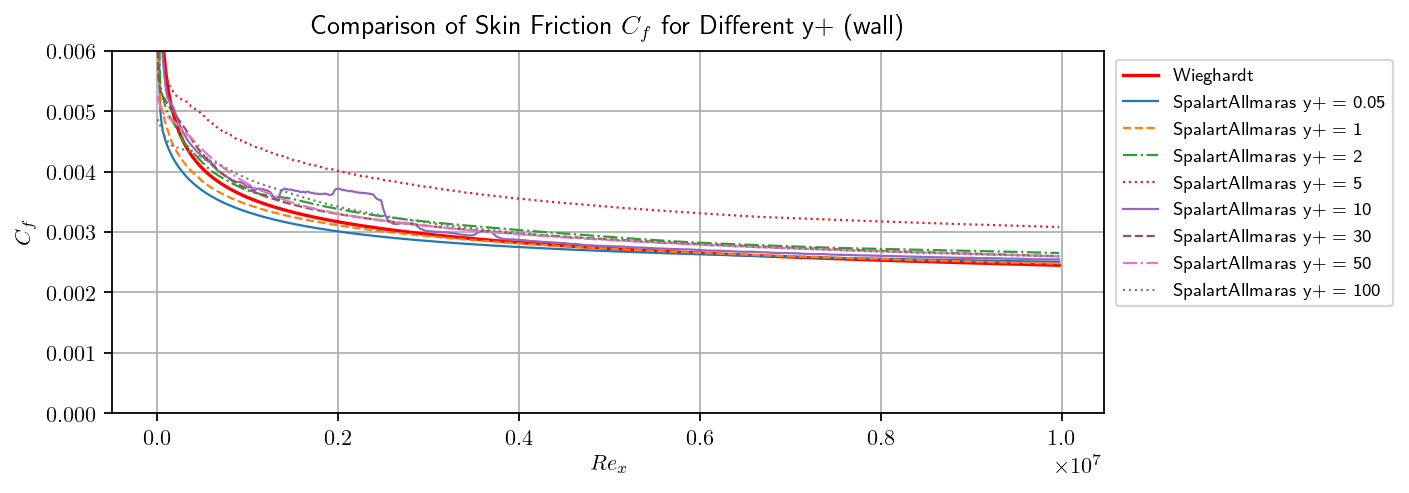

In [9]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (wall)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))
plt.savefig(output + "/Cf_distanceBased_wallCorr.pdf", bbox_inches="tight")